# Vintage Cars MPG Prediction using Machine Learning

The highly competitive automotive industry is constantly optimizing their process to increase fuel efficiency due to the increase of fuel prices. This has not always been the case; Fuel economy has not been a major competitive issue in the marketplace since 1981. Relatively low gasoline prices have allowed consumers to focus instead on vehicle prices, performance, comfort, and style.

So, what was the fuel efficiency of the cars before the price increase? The purpose of the project  is to predict the MPG (Mile Per Gallon) for a vehicle and tells us about the efficiency of fuel consumption of a vehicle in the 70s and 80s base on other attributes of that vehicle.

This notebook uses a public dataset from Kaggle (https://www.kaggle.com/uciml/autompg-dataset?select=auto-mpg.csv). 

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, skew

pd.set_option('display.max_columns', None)
from pandas.api.types import is_numeric_dtype

## Data Gathering and Preprocessing

In [2]:
# Read cvs file using pandas
mpg_df = pd.read_csv('../Data/data.csv')
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,make,model,country
0,9.0,8,304.0,193.0,4732,18.5,70,1,international (IHC),1200d,United States
1,10.0,8,307.0,200.0,4376,15.0,70,1,chevrolet,c20,United States
2,10.0,8,360.0,215.0,4615,14.0,70,1,ford,f250,United States
3,11.0,8,380.0,189.0,4648,11.0,70,2,rolls royce,silver shadow,England
4,11.0,8,380.0,189.0,4648,11.0,71,2,rolls royce,silver shadow,England
...,...,...,...,...,...,...,...,...,...,...,...
404,43.4,4,90.0,48.0,2335,23.7,80,2,volkswagen,dasher (diesel),Germany
405,44.0,4,97.0,52.0,2130,24.6,82,2,volkswagen,pickup,Germany
406,44.3,4,90.0,48.0,2085,21.7,80,2,volkswagen,rabbit c (diesel),Germany
407,44.6,4,91.0,67.0,1850,13.8,80,3,honda,civic 1500 gl,Japan


In [3]:
# Get info about the data
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           409 non-null    float64
 1   cylinders     409 non-null    int64  
 2   displacement  409 non-null    float64
 3   horsepower    403 non-null    float64
 4   weight        409 non-null    int64  
 5   acceleration  409 non-null    float64
 6   model year    409 non-null    int64  
 7   origin        409 non-null    int64  
 8   make          409 non-null    object 
 9   model         409 non-null    object 
 10  country       409 non-null    object 
dtypes: float64(4), int64(4), object(3)
memory usage: 35.3+ KB


In [4]:
# Checking for all the null values
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
make            0
model           0
country         0
dtype: int64

The horsepower column has 6 missing values

In [5]:
# Impute nulls with median
mpg_df.horsepower.fillna(mpg_df.horsepower.median(), inplace=True)
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
make            0
model           0
country         0
dtype: int64

In [6]:
mpg_df.to_csv('../Data/clean_data.csv', index=False)

# Data Exploration

In [7]:
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,23.200000,5.523227,198.443765,106.603912,3015.542787,15.445232,75.982885,1.584352
std,7.939508,1.727821,107.202320,40.115270,878.430591,2.819093,3.687844,0.794188
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,16.900000,4.000000,105.000000,76.000000,2230.000000,13.500000,73.000000,1.000000
50%,22.000000,4.000000,151.000000,95.000000,2855.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3672.000000,17.000000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


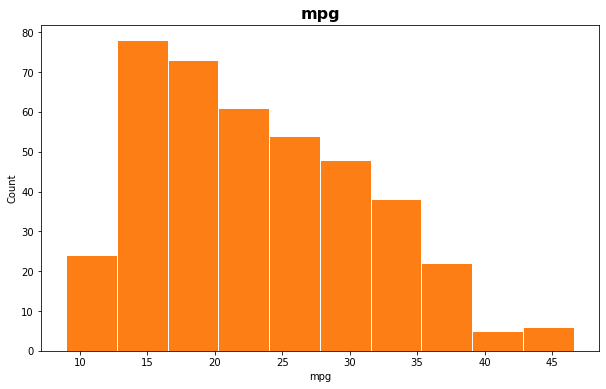

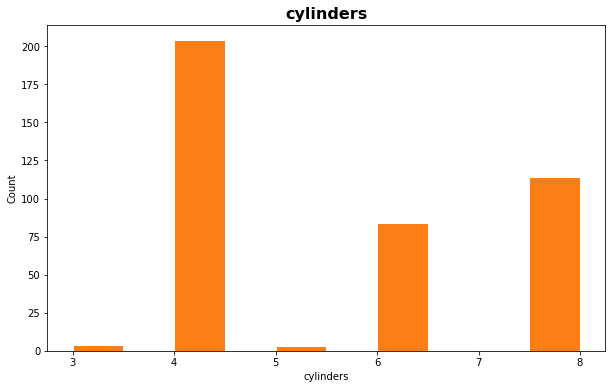

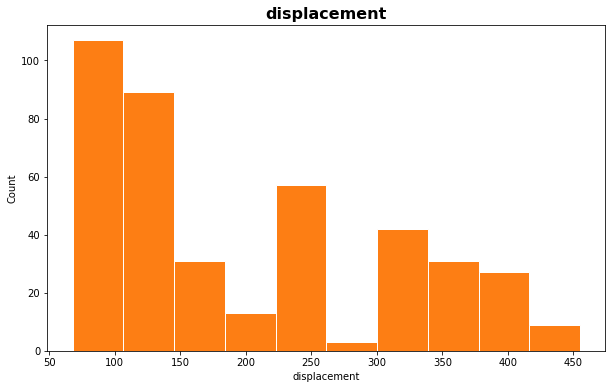

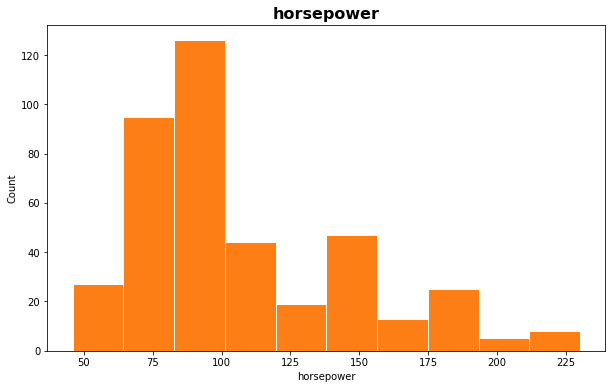

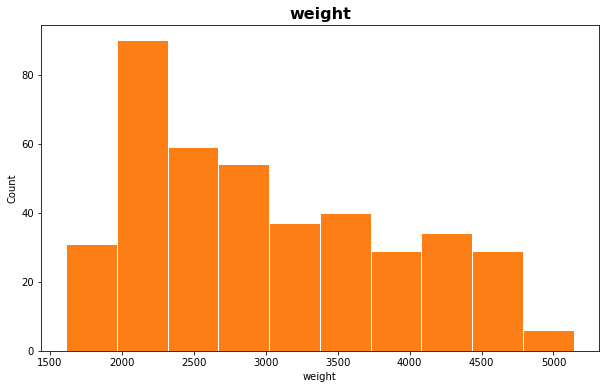

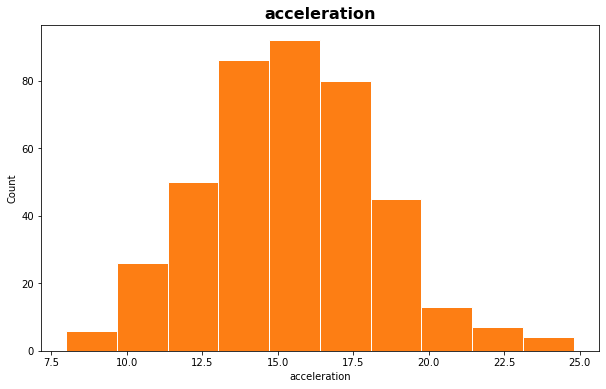

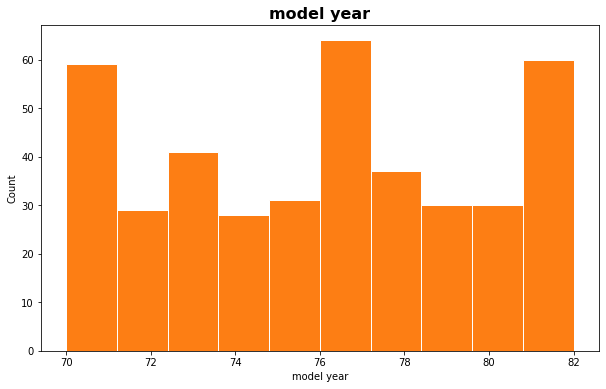

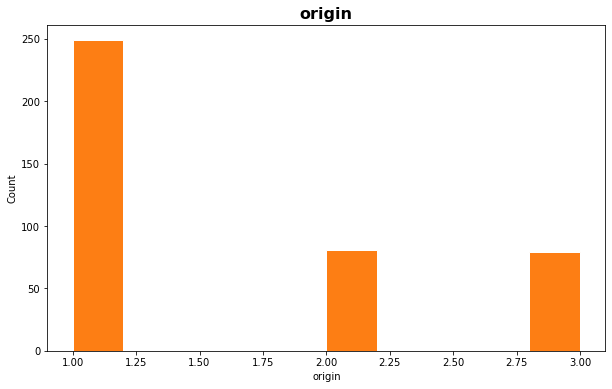

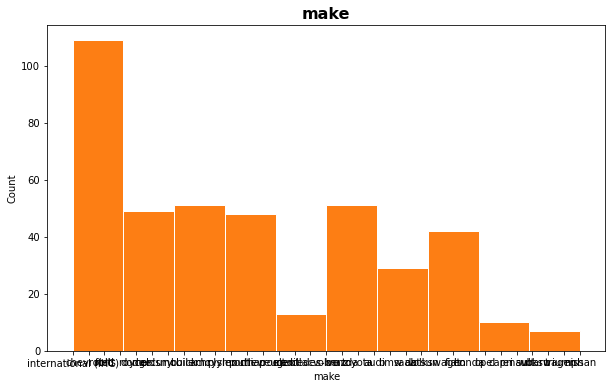

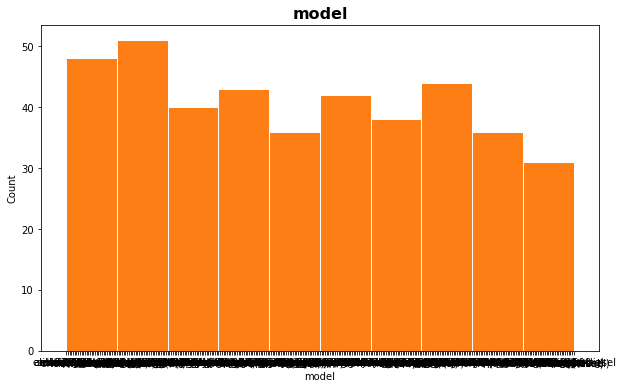

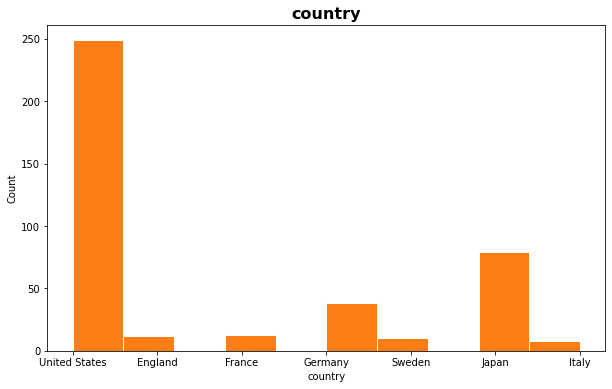

In [8]:
 # Plot distributions
for col in mpg_df.columns:
    
    plt.figure(figsize=(10,6))
    plt.hist(mpg_df[col],  color = '#FD7E14', edgecolor='white')
    plt.title(col, fontsize=16, fontweight="bold")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

In [9]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           409 non-null    float64
 1   cylinders     409 non-null    int64  
 2   displacement  409 non-null    float64
 3   horsepower    409 non-null    float64
 4   weight        409 non-null    int64  
 5   acceleration  409 non-null    float64
 6   model year    409 non-null    int64  
 7   origin        409 non-null    int64  
 8   make          409 non-null    object 
 9   model         409 non-null    object 
 10  country       409 non-null    object 
dtypes: float64(4), int64(4), object(3)
memory usage: 35.3+ KB


In [10]:
linear_feat = mpg_df.select_dtypes(exclude = "object")
categorical_feat = mpg_df.select_dtypes(include = "object")

print("Linear Features are   : ", *linear_feat)
print("Categoric Features are : ", *categorical_feat)

Linear Features are   :  mpg cylinders displacement horsepower weight acceleration model year origin
Categoric Features are :  make model country


## Correlations

In [11]:
linear_feat.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.788159,-0.816540,-0.787206,-0.841886,0.456455,0.567691,0.524289
cylinders,-0.788159,1.000000,0.953080,0.849093,0.901268,-0.536239,-0.345548,-0.523433
displacement,-0.816540,0.953080,1.000000,0.903833,0.938297,-0.577335,-0.363767,-0.557914
horsepower,-0.787206,0.849093,0.903833,1.000000,0.876306,-0.712086,-0.399472,-0.393686
weight,-0.841886,0.901268,0.938297,0.876306,1.000000,-0.464254,-0.302058,-0.523480
acceleration,0.456455,-0.536239,-0.577335,-0.712086,-0.464254,1.000000,0.286633,0.175036
model year,0.567691,-0.345548,-0.363767,-0.399472,-0.302058,0.286633,1.000000,0.174139
origin,0.524289,-0.523433,-0.557914,-0.393686,-0.523480,0.175036,0.174139,1.000000


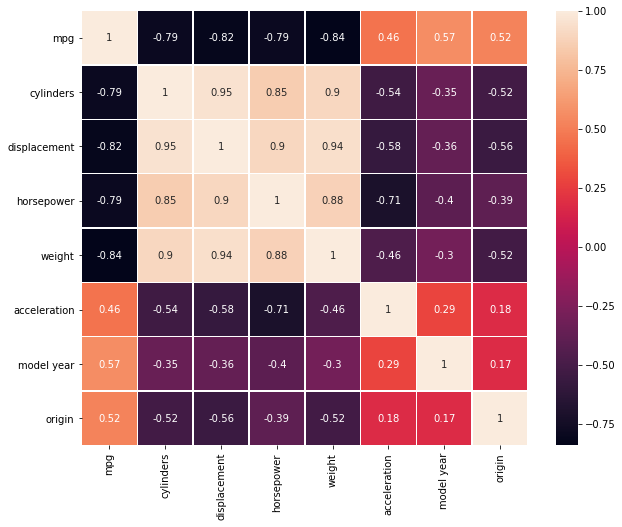

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(linear_feat.corr(), annot=True, linewidths=.5)
plt.show()

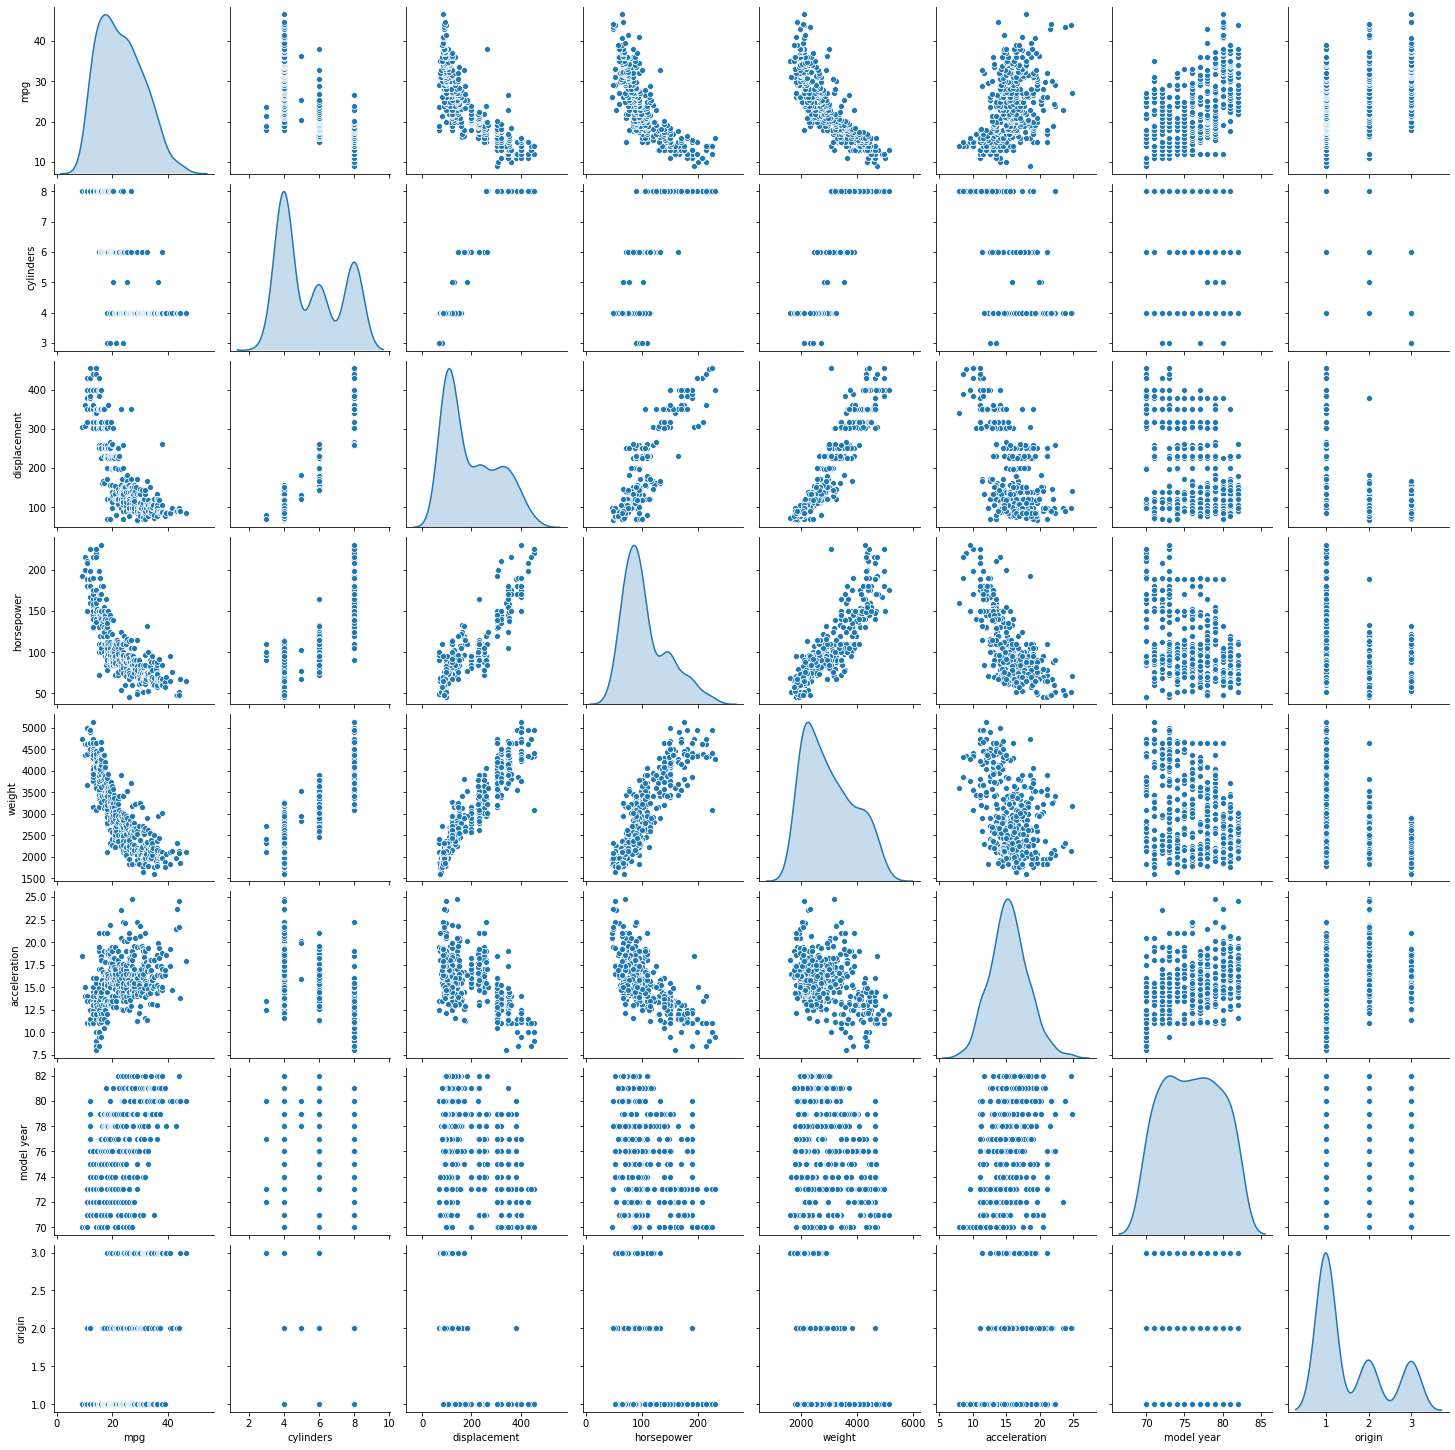

In [13]:
##pairplots to get an intuition of potential correlations

sns.pairplot(mpg_df[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin"]], diag_kind="kde")

Looking at the pair plots, It can be observe that cylinders and origin does not shows a normal distribution since they represent a specific value and can be considered categorical values.

## Data Manipulation

In [14]:
# Cast category 
#mpg_df["mpg"] = mpg_df["mpg"].astype(int)
mpg_df["origin"] = mpg_df["origin"].astype(str)
mpg_df["cylinders"] = mpg_df["cylinders"].astype(str)

In [15]:
linear_feat = mpg_df.select_dtypes(exclude = "object") #linear models don't need the extra column
categorical_feat = mpg_df.select_dtypes(include = "object")

print("Linear Features are   : ", *linear_feat)
print("Categoric Features are : ", *categorical_feat)

Linear Features are   :  mpg displacement horsepower weight acceleration model year
Categoric Features are :  cylinders origin make model country


In [16]:
# manipulate columns
categorical_feat.drop(["make", "model", "country"], axis=1, inplace=True) # useless strings

C:\Users\jeca_\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
# Label encoding - get dummies
linear_dums = pd.get_dummies(categorical_feat, drop_first=True) #linear models don't need the extra column
tree_dums = pd.get_dummies(categorical_feat, drop_first=False)

In [18]:
linear_dums.head()

,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_2,origin_3
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,1,0
4,0,0,0,1,1,0


In [19]:
tree_dums.head()

,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,0,0,0,0,1,1,0,0
1,0,0,0,0,1,1,0,0
2,0,0,0,0,1,1,0,0
3,0,0,0,0,1,0,1,0
4,0,0,0,0,1,0,1,0


In [20]:
# Combine back into the training set
df_train_linear = pd.concat([linear_feat, linear_dums], axis=1)
df_train_tree = pd.concat([linear_feat, tree_dums], axis=1)

In [21]:
df_train_linear

,mpg,displacement,horsepower,weight,acceleration,model year,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_2,origin_3
0,9.0,304.0,193.0,4732,18.5,70,0,0,0,1,0,0
1,10.0,307.0,200.0,4376,15.0,70,0,0,0,1,0,0
2,10.0,360.0,215.0,4615,14.0,70,0,0,0,1,0,0
3,11.0,380.0,189.0,4648,11.0,70,0,0,0,1,1,0
4,11.0,380.0,189.0,4648,11.0,71,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
404,43.4,90.0,48.0,2335,23.7,80,1,0,0,0,1,0
405,44.0,97.0,52.0,2130,24.6,82,1,0,0,0,1,0
406,44.3,90.0,48.0,2085,21.7,80,1,0,0,0,1,0
407,44.6,91.0,67.0,1850,13.8,80,1,0,0,0,0,1


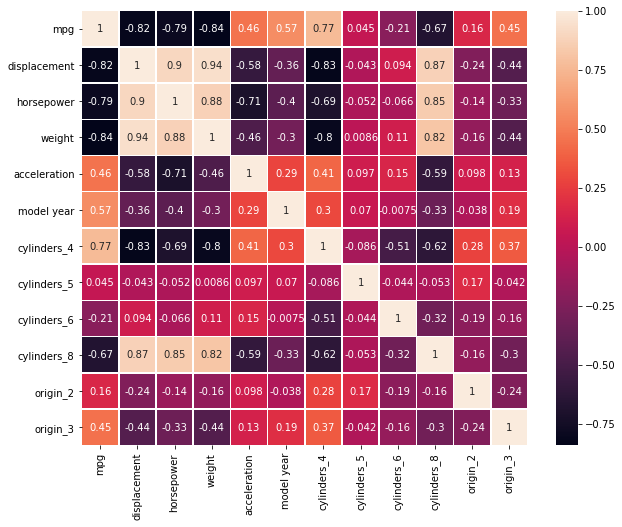

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train_linear.corr(), annot=True, linewidths=.5)
plt.show()

## Machine Learning Analysis

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve


from sklearn.model_selection import train_test_split

### Linear Models

In [24]:
features = df_train_linear.drop("mpg", axis=1)
target = df_train_linear.mpg

In [25]:
X = features.to_numpy()
y = target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

Linear Regression

Model Evaluation Report
The In Sample R2 Score: 0.8455826329089134
The In Sample RMSE: 2.9674327357677006

The Out Sample R2 Score: 0.8507259859040834
The Out Sample RMSE: 3.3691296516747364


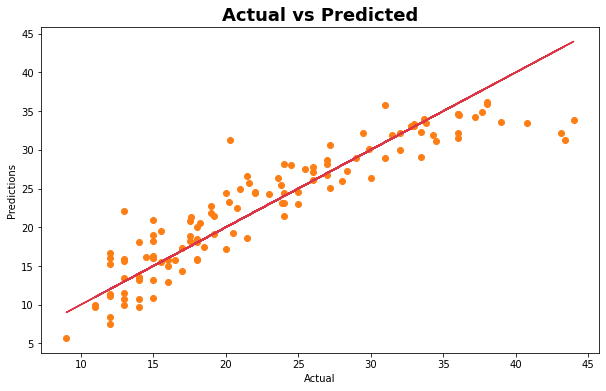

In [27]:
 #initialize
reg = LinearRegression()

# fit
reg.fit(X_train, y_train)

# predict
in_preds = reg.predict(X_train)
out_preds = reg.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
reg_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {reg_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
reg_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {reg_out_rmse}")


# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = '#FD7E14')
plt.plot(y_test, y_test, color = '#DC3545')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Ridge

Model Evaluation Report
The In Sample R2 Score: 0.8415515147673243
The In Sample RMSE: 3.0059161212166656

The Out Sample R2 Score: 0.8591053378095721
The Out Sample RMSE: 3.2732026057913726


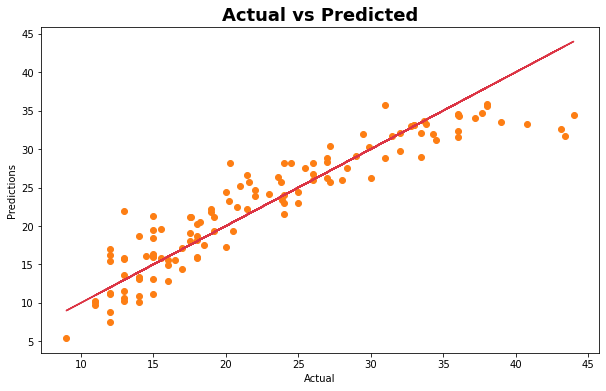

In [28]:
#initialize
ridge = Ridge()

# fit
ridge.fit(X_train, y_train)

# predict
in_preds = ridge.predict(X_train)
out_preds = ridge.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
ridge_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {ridge_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
ridge_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {ridge_out_rmse}")


# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = '#FD7E14')
plt.plot(y_test, y_test, color = '#DC3545')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Lasso

Model Evaluation Report
The In Sample R2 Score: 0.8031315012960109
The In Sample RMSE: 3.3505872110345973

The Out Sample R2 Score: 0.8344856577013106
The Out Sample RMSE: 3.5476717890073544


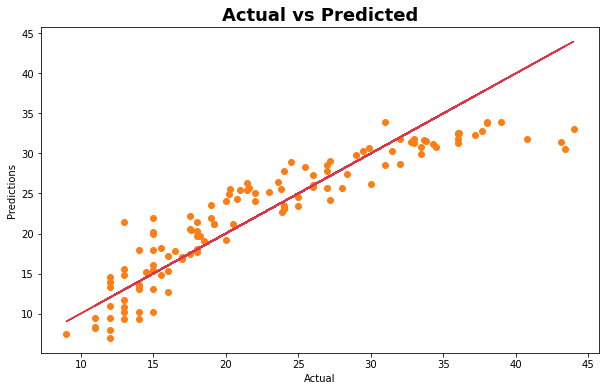

In [29]:
 #initialize
lasso = Lasso()

# fit
lasso.fit(X_train, y_train)

# predict
in_preds = lasso.predict(X_train)
out_preds = lasso.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
lasso_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {lasso_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
lasso_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {lasso_out_rmse}")


# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = '#FD7E14')
plt.plot(y_test, y_test, color = '#DC3545')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Elastic Net

Model Evaluation Report
The In Sample R2 Score: 0.803633557413395
The In Sample RMSE: 3.3463121323221747

The Out Sample R2 Score: 0.8346667364178618
The Out Sample RMSE: 3.5457306168830875


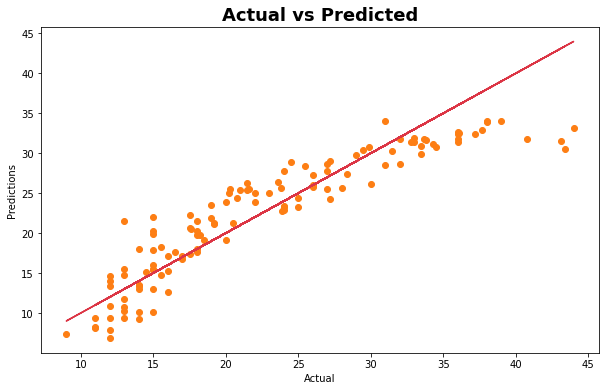

In [30]:
#initialize
en = ElasticNet()

# fit
en.fit(X_train, y_train)

# predict
in_preds = en.predict(X_train)
out_preds = en.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
en_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {en_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
en_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {en_out_rmse}")


# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = '#FD7E14')
plt.plot(y_test, y_test, color = '#DC3545')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

In [31]:
# Logistic Regression

In [32]:
# # initialize
# log = LogisticRegression()

# # fit
# log = log.fit(X_train, y_train)

# # predictions
# in_preds = log.predict(X_train)
# out_preds = log.predict(X_test)

# # evaluation
# print("Model Evaluation Report")
# print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
# print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# # roc curve
# plot_roc_curve(log, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

# print()
# print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
# print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# # roc curve
# plot_roc_curve(log, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()

### Random Forests

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

Decision Tree Regressor

Model Evaluation Report
The In Sample R2 Score: 1.0
The In Sample RMSE: 0.0

The Out Sample R2 Score: 0.8624683025963069
The Out Sample RMSE: 3.2339032269535855


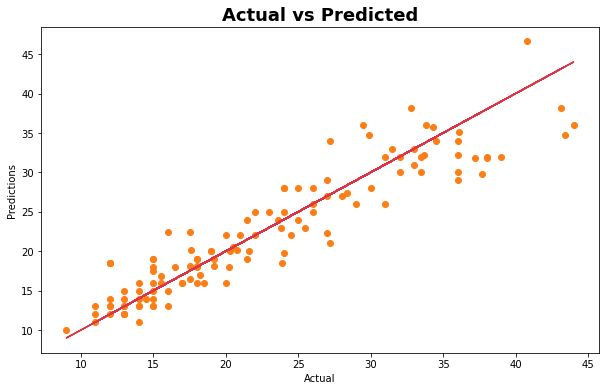

In [34]:
#initialize
dt = DecisionTreeRegressor()

# fit
dt.fit(X_train, y_train)

# predict
in_preds = dt.predict(X_train)
out_preds = dt.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
dt_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {dt_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
dt_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {dt_out_rmse}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = '#FD7E14')
plt.plot(y_test, y_test, color = '#DC3545')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Random Forest Regressor

Model Evaluation Report
The In Sample R2 Score: 0.9776095579561433
The In Sample RMSE: 1.1299627987564138

The Out Sample R2 Score: 0.9283012819438978
The Out Sample RMSE: 2.334970045593976


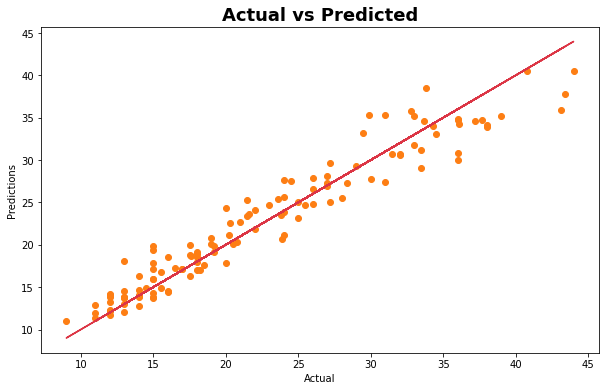

In [35]:
#initialize
rf = RandomForestRegressor()

# fit
rf.fit(X_train, y_train)

# predict
in_preds = rf.predict(X_train)
out_preds = rf.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
rf_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {rf_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
rf_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {rf_out_rmse}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = '#FD7E14')
plt.plot(y_test, y_test, color = '#DC3545')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Ada Boost Regressor

Model Evaluation Report
The In Sample R2 Score: 0.9014980745771881
The In Sample RMSE: 2.3700372487033983

The Out Sample R2 Score: 0.8833263682354018
The Out Sample RMSE: 2.978598568722578


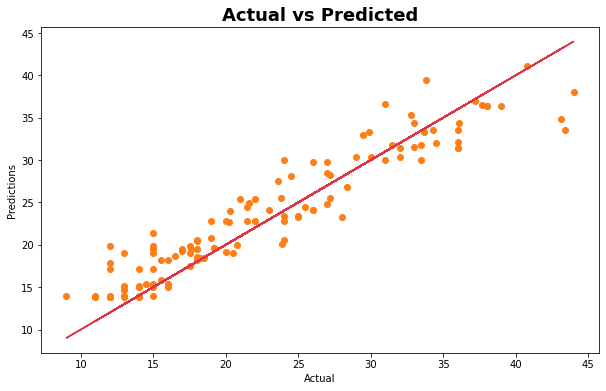

In [36]:
#initialize
ada = AdaBoostRegressor()

# fit
ada.fit(X_train, y_train)

# predict
in_preds = ada.predict(X_train)
out_preds = ada.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
ada_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {ada_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
ada_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {ada_out_rmse}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = '#FD7E14')
plt.plot(y_test, y_test, color = '#DC3545')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

Gradient Boosting Regressor

Model Evaluation Report
The In Sample R2 Score: 0.9677304964704724
The In Sample RMSE: 1.3565285973188295

The Out Sample R2 Score: 0.9074102116117262
The Out Sample RMSE: 2.653427121881666


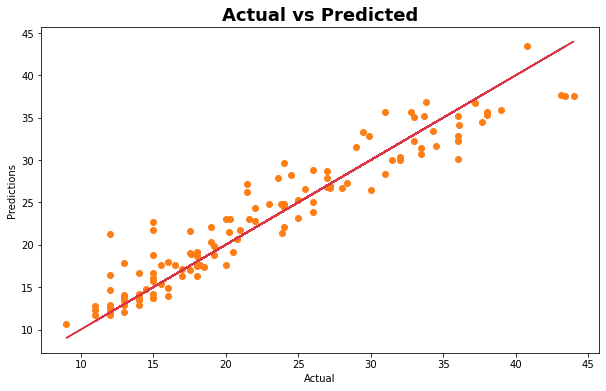

In [37]:
#initialize
gb = GradientBoostingRegressor()

# fit
gb.fit(X_train, y_train)

# predict
in_preds = gb.predict(X_train)
out_preds = gb.predict(X_test)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
gb_in_rmse = np.sqrt(mean_squared_error(y_train, in_preds))
print(f"The In Sample RMSE: {gb_in_rmse}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
gb_out_rmse =np.sqrt(mean_squared_error(y_test, out_preds))
print(f"The Out Sample RMSE: {gb_out_rmse}")

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_preds, color = '#FD7E14')
plt.plot(y_test, y_test, color = '#DC3545')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

### Model Selection

In [38]:
model_names = ["LINEAR","RIDGE","LASSO","ELASTICNET","DECISION TREE","RANDOM FR","ADA BOOTS","GRADIENT BOOSTING"]

models = {"Model":model_names,
          "IN SAMPLE RMSE":[reg_in_rmse, ridge_in_rmse, lasso_in_rmse, en_in_rmse, dt_in_rmse, rf_in_rmse, ada_in_rmse, gb_in_rmse],
          "OUT SAMPLE RMSE":[reg_out_rmse, ridge_out_rmse, lasso_out_rmse, en_out_rmse, dt_out_rmse, rf_out_rmse, ada_out_rmse, gb_out_rmse]}

model_performance = pd.DataFrame(models)

model_performance.sort_values(by = "OUT SAMPLE RMSE",kind='quicksort', ascending=True).style.background_gradient(cmap='YlOrRd')

,Model,IN SAMPLE RMSE,OUT SAMPLE RMSE
5,RANDOM FR,1.129963,2.334970
7,GRADIENT BOOSTING,1.356529,2.653427
6,ADA BOOTS,2.370037,2.978599
4,DECISION TREE,0.000000,3.233903
1,RIDGE,3.005916,3.273203
0,LINEAR,2.967433,3.369130
3,ELASTICNET,3.346312,3.545731
2,LASSO,3.350587,3.547672


The Random Forest model was choosen because it has the lowest RMSE and doesn't overfit the in sample data.

### Ramdom Forest Final Model

Model Evaluation Report
The In Sample R2 Score: 0.9840390892194754
The In Sample RMSE: 1.0018226421662508



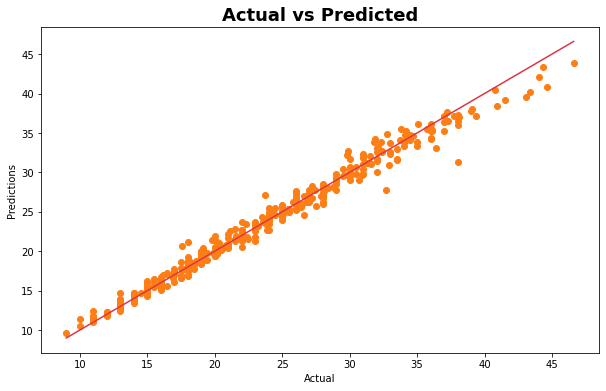

In [39]:
#initialize
rf_final = RandomForestRegressor()

# fit
rf_final.fit(X, y)

# predict
in_preds = rf_final.predict(X)

#evaluate
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y, in_preds)}")
print(f"The In Sample RMSE: {np.sqrt(mean_squared_error(y, in_preds))}")
print()

# make Plot
plt.figure(figsize=(10,6))
plt.scatter(y, in_preds, color = '#FD7E14')
plt.plot(y, y, color = '#DC3545')
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
plt.show()

In [40]:
feature_imp = pd.DataFrame(list(zip(features.columns, rf_final.feature_importances_)), columns=["Feature", "Importance"])
feature_imp.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,displacement,0.375990
2,weight,0.206187
5,cylinders_4,0.178941
4,model year,0.111025
1,horsepower,0.094103
3,acceleration,0.026500
10,origin_3,0.003731
9,origin_2,0.002282
7,cylinders_6,0.000628
6,cylinders_5,0.000487


In [41]:
# Testing the Model
results = pd.DataFrame({'Label mpg': target,
'Prediction': rf_final.predict(X)})
results

,Label mpg,Prediction
0,9.0,9.690
1,10.0,11.445
2,10.0,10.510
3,11.0,10.970
4,11.0,11.240
...,...,...
404,43.4,40.214
405,44.0,42.048
406,44.3,43.410
407,44.6,40.805


In [42]:
# Save model to disk
import pickle

In [43]:
filename = 'finalized_model.sav'
pickle.dump(rf_final, open(filename, 'wb'))

In [44]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9891293352251074
